In [1]:
import adcc
from pyscf import gto, scf
from matplotlib import pyplot as plt 
import matplotlib
from pyscf.tools import cubegen
import numpy as np
from scipy import constants

plt.rcParams['figure.dpi'] = 150  # Increase figure size a bit

In [2]:
# Run the SCF
mol = gto.M(
    atom='S  -0.38539679062   0 -0.27282082253;'
         'H  -0.0074283962687 0  2.2149138578;'
         'H   2.0860198029    0 -0.74589639249',
    basis='cc-pvtz',
    unit="Bohr"
)   
scfres = scf.RHF(mol)
scfres.conv_tol = 1e-13
scfres.kernel()

converged SCF energy = -398.712994875735


-398.7129948757352

In [3]:
# Run a conventional CVS-ADC(2)-x (1s, 2s, 2p, 2p, 2p)
cvs_full = adcc.cvs_adc2x(scfres, core_orbitals=5, n_singlets=5)

Starting cvs-adc2x  singlet Jacobi-Davidson ...
Niter n_ss  max_residual  time  Ritz values
  1    10       0.65637   2.3s  [6.44251489 6.44286471 6.45269953 6.48295288 6.49289677]
  2    20        0.1152   3.6s  [6.1389989  6.14109136 6.15202856 6.15741361 6.17031211]
  3    30       0.00879   4.1s  [6.10251487 6.10434684 6.11614845 6.12236894 6.12732052]
  4    40     0.0021655   3.9s  [6.09870037 6.10021673 6.11214453 6.11808429 6.12221008]
  5    50    0.00053031   3.9s  [6.09797312 6.09936483 6.11126035 6.11713955 6.12084436]
=== Restart ===
  6    20    9.8453e-05   4.1s  [6.09791616 6.09928843 6.11117019 6.11705098 6.12063464]
  7    30    4.5499e-05   3.8s  [6.09790771 6.09927471 6.11115165 6.11703391 6.12055906]
  8    40     1.286e-05   4.0s  [6.09790618 6.09927191 6.11114737 6.11703033 6.12053258]
  9    50    1.5436e-06   4.1s  [6.09790592 6.09927139 6.11114667 6.11702961 6.12052689]
=== Restart ===
 10    20    3.4861e-07   4.0s  [6.0979059  6.09927134 6.1111466  6.1170294

In [4]:
# Run a frozen-core, frozen-virtual CVS
# 1s and 2s frozen, 2ps in core, 10 virtuals frozen
cvs_frozen = adcc.cvs_adc2x(scfres, frozen_core=2, frozen_virtual=10,
                            core_orbitals=3, n_singlets=5)

Starting cvs-adc2x  singlet Jacobi-Davidson ...
Niter n_ss  max_residual  time  Ritz values
  1    10       0.55518   1.7s  [6.44247121 6.44282092 6.45265471 6.48292613 6.49286983]
  2    20      0.089258   1.9s  [6.15423444 6.15595117 6.16746521 6.17419059 6.18593482]
  3    30     0.0066978   2.0s  [6.12153685 6.12298495 6.13541885 6.14271029 6.14724423]
  4    40     0.0018097   2.2s  [6.11801773 6.11919385 6.1317687  6.13889899 6.14271254]
  5    50    0.00029428   2.2s  [6.11738516 6.11844157 6.13096254 6.13805121 6.1414262 ]
=== Restart ===
  6    20    6.8496e-05   2.3s  [6.11734567 6.11838784 6.13089759 6.13798775 6.14126555]
  7    30    2.6697e-05   2.2s  [6.11734053 6.11837942 6.13088537 6.13797498 6.14120874]
  8    40    6.6272e-06   2.1s  [6.11733973 6.11837784 6.13088285 6.13797248 6.14119074]
  9    50    9.8157e-07   2.3s  [6.1173396  6.11837756 6.13088248 6.13797207 6.14118697]
=== Converged ===
    Number of matrix applies:    90
    Total solver time:            18s

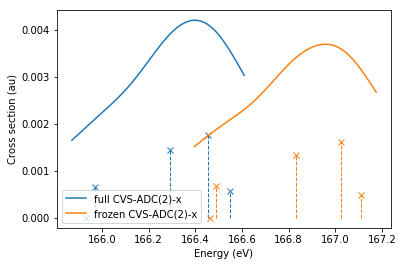

In [5]:
# Compare the spectra
cvs_full.plot_spectrum(label="full CVS-ADC(2)-x")
cvs_frozen.plot_spectrum(label="frozen CVS-ADC(2)-x")
plt.legend()

In [6]:
cvs_full  # Display results

+--------------------------------------------------------------+
| cvs-adc2x                               singlet ,  converged |
+--------------------------------------------------------------+
|  #        excitation energy     osc str    |v1|^2    |v2|^2  |
|          (au)           (eV)                                 |
|  0      6.097906      165.9325   0.0000    0.8493    0.1507  |
|  1      6.099271      165.9696   0.0046    0.8487    0.1513  |
|  2      6.111147      166.2928   0.0101    0.8451    0.1549  |
|  3      6.117029      166.4529   0.0123    0.8296    0.1704  |
|  4      6.120526       166.548   0.0040    0.8288    0.1712  |
+--------------------------------------------------------------+


In [7]:
cvs_frozen  # Display results

+--------------------------------------------------------------+
| cvs-adc2x                               singlet ,  converged |
+--------------------------------------------------------------+
|  #        excitation energy     osc str    |v1|^2    |v2|^2  |
|          (au)           (eV)                                 |
|  0       6.11734      166.4613   0.0000    0.8506    0.1494  |
|  1      6.118378      166.4895   0.0047    0.8498    0.1502  |
|  2      6.130882      166.8298   0.0093    0.8454    0.1546  |
|  3      6.137972      167.0227   0.0112    0.8285    0.1715  |
|  4      6.141187      167.1102   0.0033    0.8275    0.1725  |
+--------------------------------------------------------------+


In [8]:
# Compute avg shift and stddev in eV
eV = constants.value("Hartree energy in eV")
shift = eV * (cvs_frozen.excitation_energies - cvs_full.excitation_energies)
print("Shift: ", np.average(shift), "+-", np.std(shift))

Shift:  0.5435698269806515 +- 0.019285095938048256


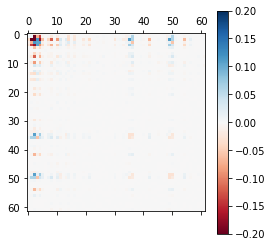

In [9]:
# Plot difference of state densities of state with highest oscillator strength
imax = np.argmax(cvs_full.oscillator_strengths)
dm_full_ao = cvs_full.state_diffdms[imax].to_ao_basis()
dm_frozen_ao = cvs_frozen.state_diffdms[imax].to_ao_basis()

dm_diff = (dm_full_ao[0] + dm_full_ao[1] - dm_frozen_ao[0] - dm_frozen_ao[1]).to_ndarray()

img = plt.matshow(dm_diff, cmap=matplotlib.cm.RdBu, vmax=0.2, vmin=-0.2)
plt.colorbar(img)

In [10]:
# Save it as a cube file
cubegen.density(mol, "diffdens.cube", dm_diff)